In [1]:
import os
import numpy as np
import topf
import sklearn.metrics
import matplotlib.pyplot as plt
import Bio.PDB.PDBList # install using 'pip install biopython'
from Bio.PDB.MMCIFParser import MMCIFParser
import plotly.io
plotly.io.renderers.default = "png" # Only activate this line if you want to render the plotly plots as png for display on github

# Topological Point Features in higher dimensions

Topological Data Analysis (TDA) allows us to extract powerful topological, and higher-order information on the global shape of a data set or point cloud. Tools like Persistent Homology or the Euler Transform give a single complex description of the global structure of the point cloud. However, common machine learning applications like classification require point-level information and features to be available. Topological Point Features (TOPF) is a novel method to extract node-level topological features from complex point clouds using discrete variants of concepts from algebraic topology and differential geometry. For the entire paper, see 

    Vincent P. Grande and Michael T. Schaub: "Node-Level Topological Representation Learning on Point Clouds"

## TOPF in 3d

TOPF works in arbitrary dimensions `d`. For `d < 4`, alpha filtrations are used, which significantly speeds up computations. The maximum homology dimension can be set by `max_hom_dim`, which defaults to `1`. Note that 2-simplices will not be drawn as faces and just their boundary will show up. All of the plots in the jupyter Notebook should be interactive.

Input shape: (650, 3)
max_hom_dim = 2


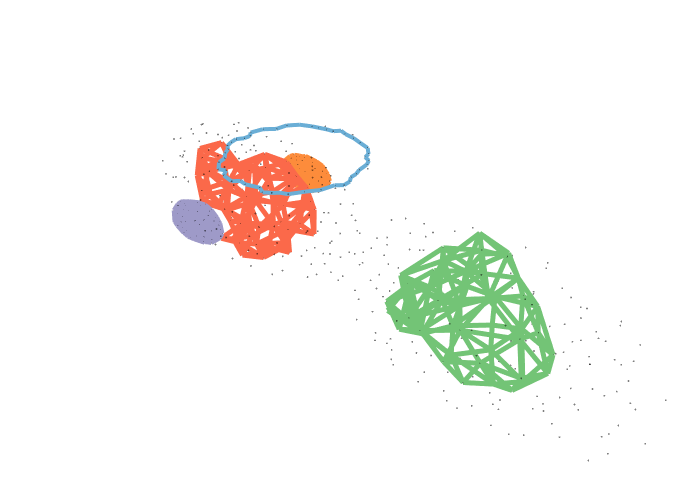

For performance reasons, not all simplices above specified `simplex_threshs` in current dimension are plotted. Increase threshold or increase `max_num_simplices` to plot all simplices.


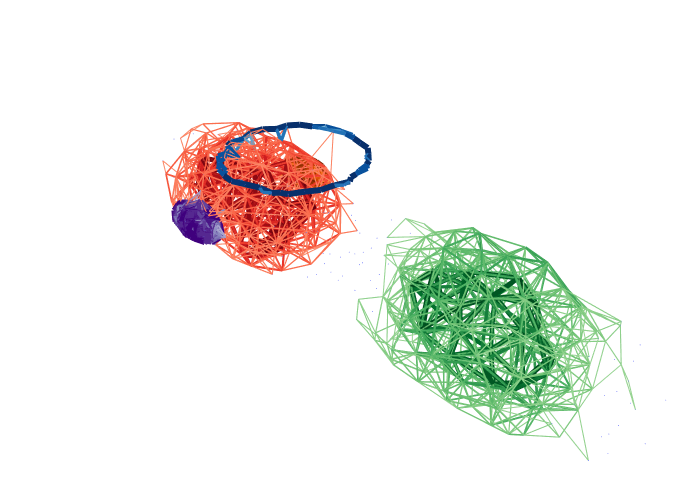

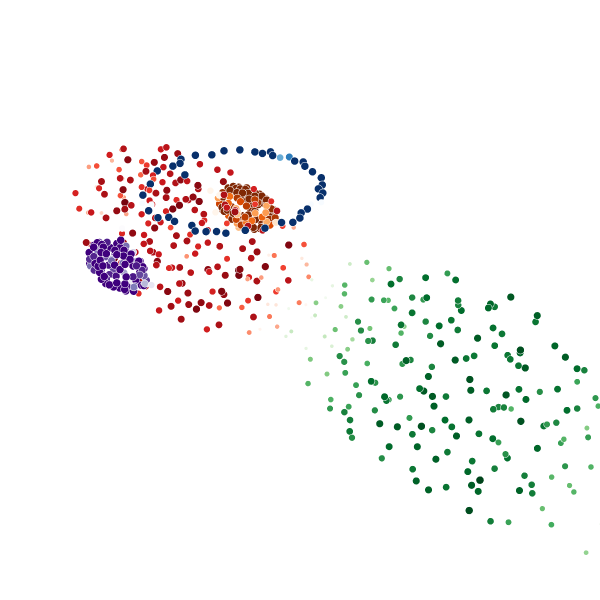

In [2]:
base_points = np.loadtxt('TopologicalClusteringBenchmarkSuite/dim2/spaceship_v2TRUE.csv', delimiter=',')[:,:3]
print("Input shape:", base_points.shape)
print("max_hom_dim = 2")
topological_features = topf.topf(base_points, draw_reps = True, draw_signature_heatmaps = "One plot", draw_scaled_vecs = True, max_hom_dim = 2)


## TOPF on proteins

We can apply TOPF to protein files from the [protein database](https://www.rcsb.org). First, we'll pick [NALCN Channelosome](https://www.rcsb.org/structure/7SX3), ("Structural architecture of the human NALCN channelosome.", Kschonsak et al., 2022.)

Structure exists: './ProteinFiles/7sx3.cif' 


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:




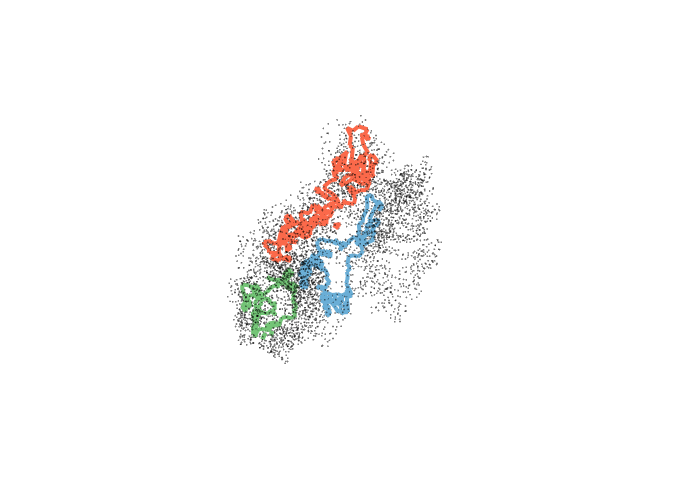

For performance reasons, not all simplices above specified `simplex_threshs` in current dimension are plotted. Increase threshold or `max_num_simplices_drawn` (default 750) to draw all simplices.


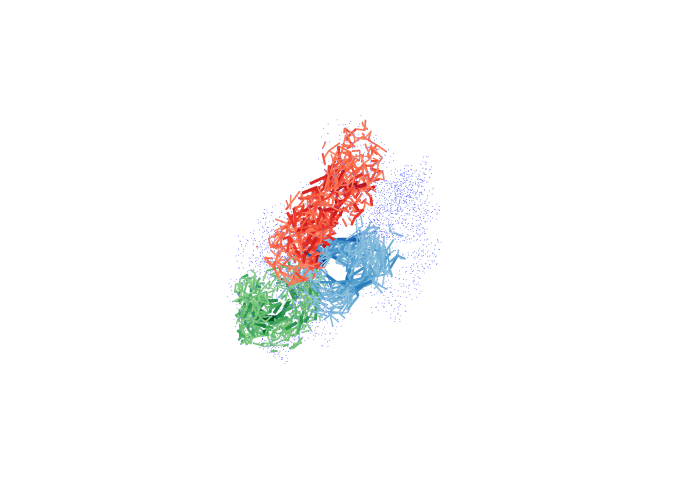

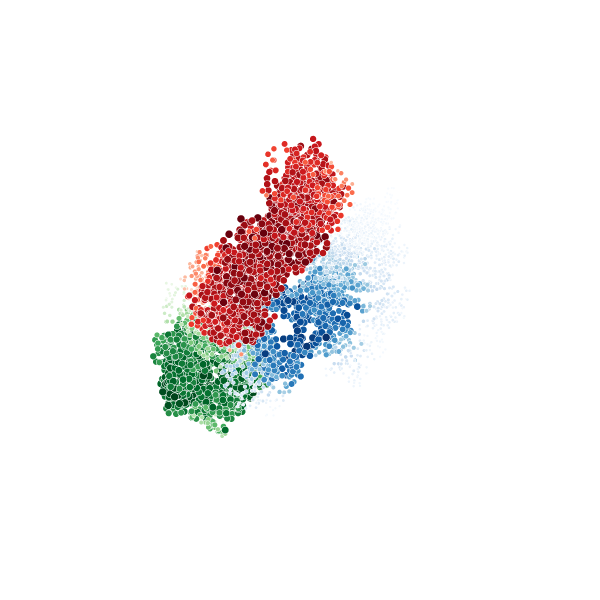

In [3]:
pdbl = Bio.PDB.PDBList()
pdbl.retrieve_pdb_file('7sx3', pdir='./ProteinFiles', file_format='mmCif')
parser = MMCIFParser()
protein_name = '7sx3'
pointsprotein =[]
structure = parser.get_structure(protein_name, "ProteinFiles/"+protein_name+".cif")
model1 = structure[0]
for Chain in model1:  
    for Residue in Chain:
        for Atom in Residue:
            if Atom.get_id() == 'CA':
                pointsprotein.append(Atom.get_coord())
pointsprotein = np.array(pointsprotein)

top_features = topf.topf(pointsprotein, draw_reps = True, draw_signature_heatmaps = "One plot", draw_scaled_vecs = True, interpolation_coefficient = 0.5)

## Surface structures of proteins
In the previous example, we only considered `1`-dimensional homology. By adding points sampled on the convex hull, and then removing them before returning the labels, we can detect structures somewhat similar to protein pockets. To consider the convex hull, we set `add_convex_hull = True`, and to only consider `2`-dimensional homology, we set `only_dims = 2` and `max_hom_dim = 2`.
We consider mutated [Cys123 of E. coli](https://www.rcsb.org/structure/2NU9), ("Participation of Cys 123alpha of Escherichia coli Succinyl-CoA Synthetase in Catalysis", Hidber et al., 2007.)

Structure exists: './ProteinFiles/2nu9.cif' 


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning:


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBC

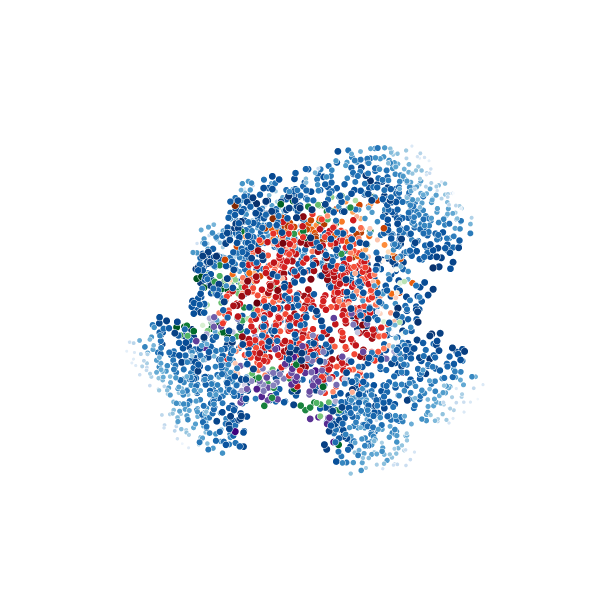

In [4]:
pdbl = Bio.PDB.PDBList()
pdbl.retrieve_pdb_file('2nu9', pdir='./ProteinFiles', file_format='mmCif')
parser = MMCIFParser()
protein_name = '2nu9'
pointsprotein =[]
structure = parser.get_structure(protein_name, "ProteinFiles/"+protein_name+".cif")
model1 = structure[0]
for Chain in model1:  
    for Residue in Chain:
        for Atom in Residue:
            if Atom.get_id() == 'CA':
                pointsprotein.append(Atom.get_coord())
pointsprotein = np.array(pointsprotein)

top_features = topf.topf(pointsprotein, draw_signature_heatmaps = "One plot", only_dims = [2], max_hom_dim=2, add_convex_hull = True)

## Downsampling large point clouds

TOPF also works for very large point clouds by downsampling the point cloud using a combination of random features and min-max-landmark sampling and then interpolating the features. Although being sensitive to the parameters of the system, this works for sampled trajectories of dynamical systems like the Lorenz attractor.

Input shape:  (100001, 3)


/Users/vincent/Documents/PhD/Programming/topf_package/.venv/lib/python3.9/site-packages/topf/topfmain.py:495: RuntimeWarning:

Alpha complex with many points. TOPF is performing sparsification down to 10000 points. This might distort homology classes. Try to set thresh_dist to distance cutoff where no homology classes are expected, sparsify_input to 'landmark', 'off', or 'random' and specify num_sparse_points larger than 5000 to avoid this.



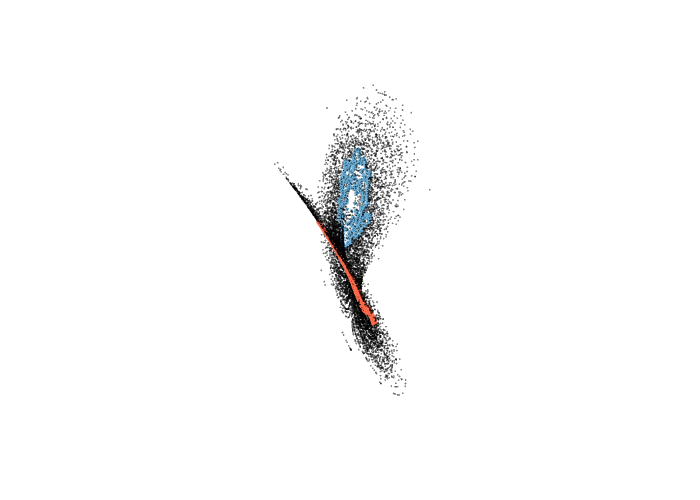

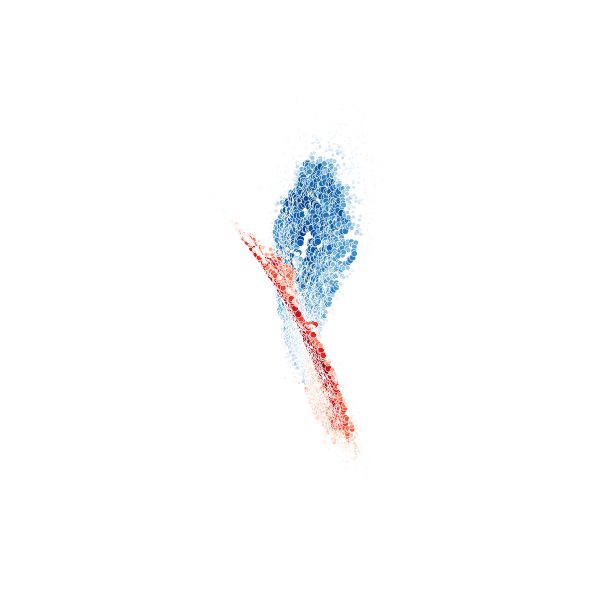

Feature shape:  (100001, 2)


In [5]:
def step_lorentz(point, a, b, c, dt):
    x, y, z = point
    x_new = x + a * (y - x) * dt
    y_new = y + (x * (b - z) - y) * dt
    z_new = z + (x * y - c * z) * dt
    return np.array([x_new, y_new, z_new])

def make_lorentz_points(num_points, a, b, c, dt, start_point = np.random.rand(3) * 2 - 1):
    points = [start_point]
    for i in range(num_points):
        points.append(step_lorentz(points[-1], a, b, c, dt))
    return np.array(points)

lorentz_points = make_lorentz_points(100000, 10, 28, 8/3, 0.0041, np.array([-0.1, 0.1, 0.2]))
print("Input shape: ",lorentz_points.shape)
topological_features = topf.topf(lorentz_points, draw_reps = True, draw_signature_heatmaps = "One plot", interpolation_coefficient=0.5)
print("Feature shape: ",topological_features.shape)

## More examples

We showcase the behaviour of topf on the `3d` topological clustering benchmark suite (TCBS):

Two_Spheres_2_CirclesTRUE.csv
(4600, 4)
4600


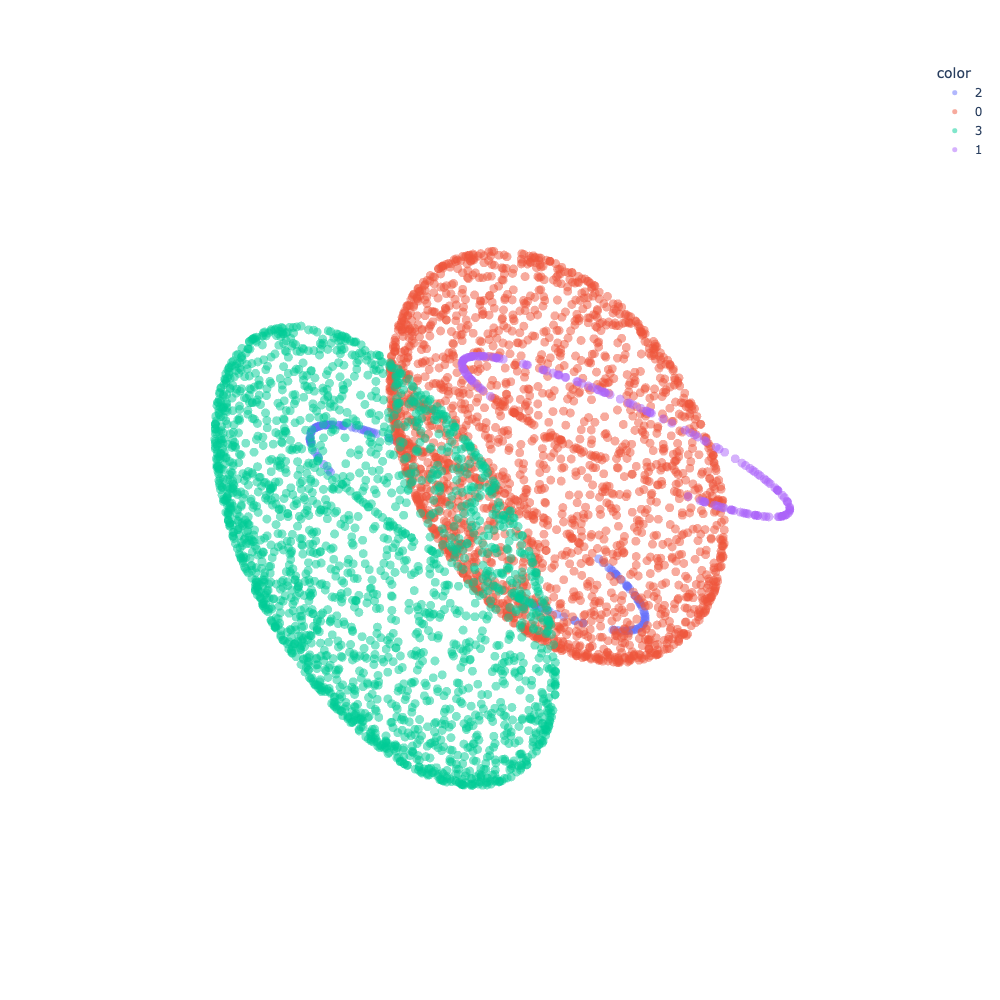

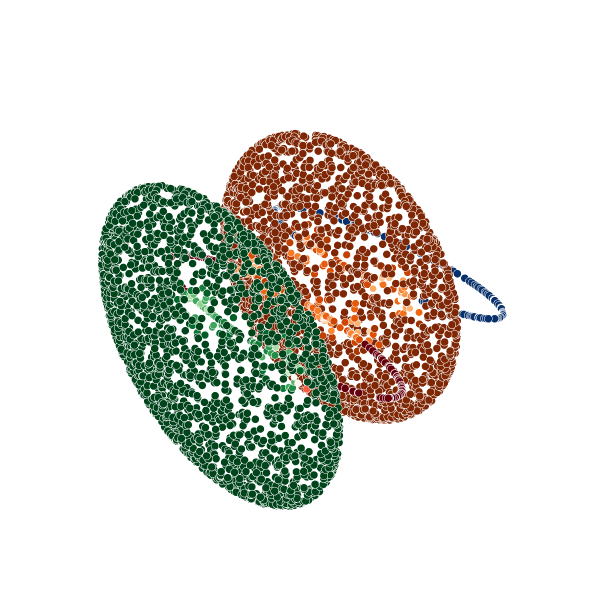

ARI:  0.9439415597043308
spaceship_v2TRUE.csv
(650, 4)
650


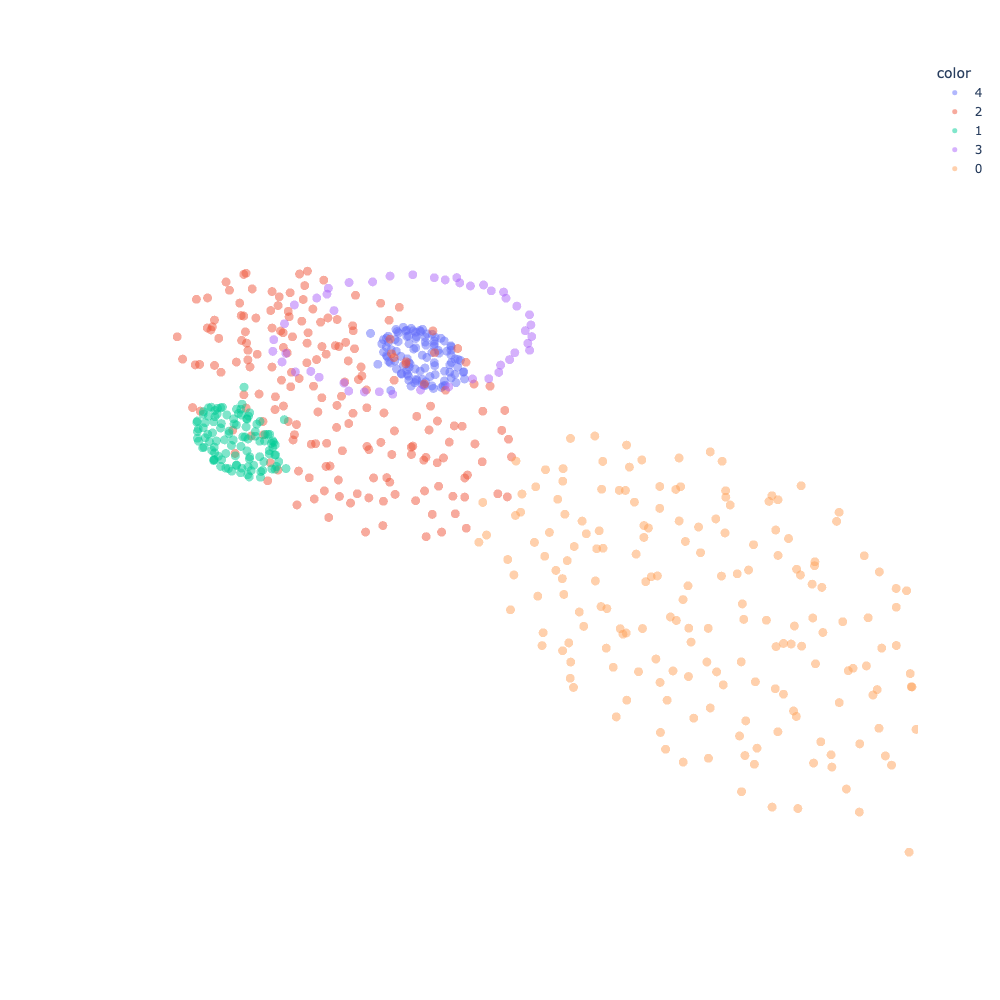

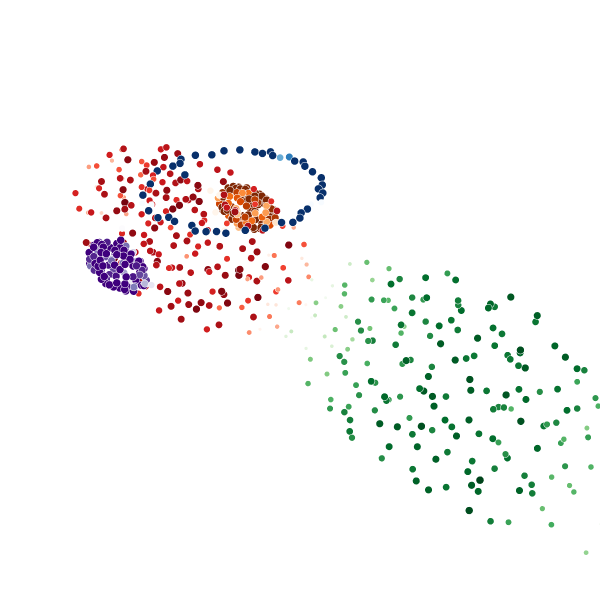

ARI:  0.9222047494777978
SphereinCircleTRUE.csv
(267, 4)
267


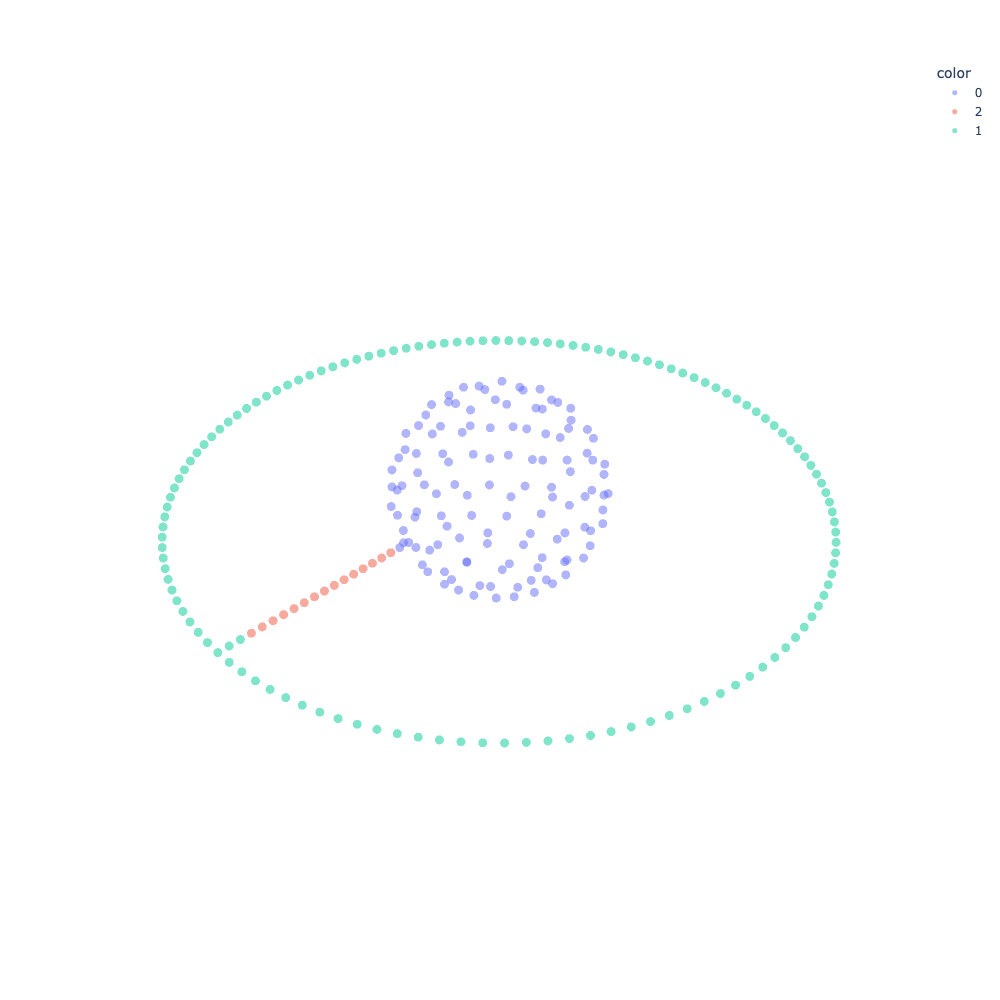

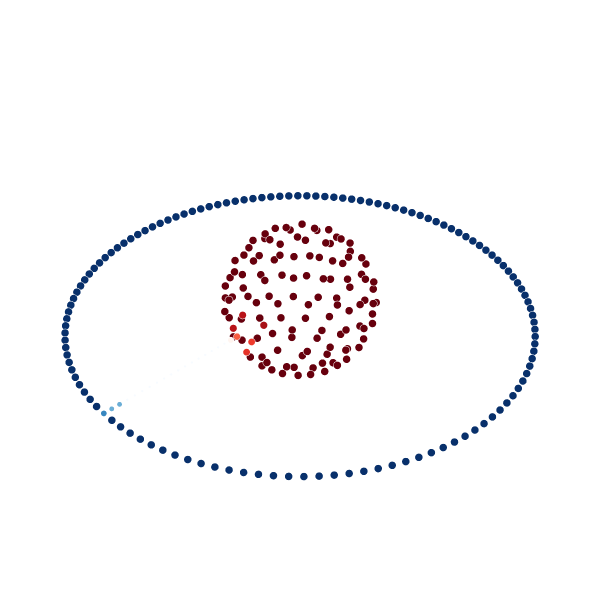

ARI:  0.9680124081132209


In [6]:
num_dict = {'4spheresTRUE.csv': 5, 'spaceship_v2TRUE.csv':5,'spheresAndGridTRUE.csv':6, "Two_Spheres_2_CirclesTRUE.csv":4, "SphereinCircleTRUE.csv":3, "HalvedCircleTRUE.csv":3, "EllipsesInEllipsesTRUE.csv":4}
for filename in os.listdir('TopologicalClusteringBenchmarkSuite/dim2'):
    if filename.endswith(".csv"):
        points_with_labels = np.loadtxt('TopologicalClusteringBenchmarkSuite/dim2/'+filename, delimiter=',')
        print(filename)
        print(points_with_labels.shape)
        base_points = points_with_labels[:,:3]
        print(len(base_points))
        true_labels = points_with_labels[:,3]
        signatures, output_dict = topf.topf(base_points, n_clusters = num_dict[filename], draw_final_clustering = True, max_hom_dim= 2, draw_signature_heatmaps = "One plot", return_dict = True)
        print("ARI: ", sklearn.metrics.adjusted_rand_score(true_labels, output_dict['labels']))
